In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [48]:
#Step 1 Load the data into a dataframe
train_data = pd.read_csv('./data.csv')
print(train_data.shape)
#1460 rows × 81 columns

(1460, 81)


In [49]:
#Step 2 Data Cleaning
#First of all we check if the data has any unusual values such as NaN or mixed categories (E.g. Integers Columns that contain Strings)

nan_rows = train_data[train_data['SalePrice'].isnull()]
#nan_rows

#train_data.select_dtypes(include=[ 'int'])
#Dataset has no NaN Targets and Targets are integer only

# Filter string predictors
X = train_data.select_dtypes(exclude=['object'])

# Drop Columns with missing values
cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
reduced_X = X.drop(cols_with_missing, axis=1)
reduced_X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


180921.19589041095

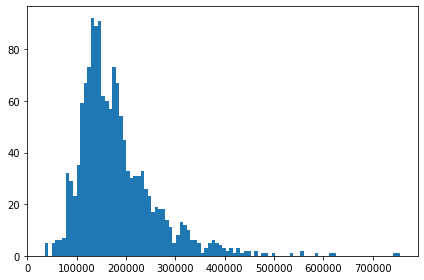

In [50]:
#Step 3 Data exploration
price_variation = train_data["SalePrice"]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
n_bins = 100
axs.hist(price_variation, bins=n_bins)
np.average(price_variation)
#Average Price is roughly 180921 Dollars
#Price Distribution seems to be a Gamma Distribution

In [51]:
# Break off validation set from training data
y = reduced_X['SalePrice']
reduced_X.drop(['SalePrice'], axis=1, inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(reduced_X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
X_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,11694,9,5,2007,2007,48,0,1774,...,774,0,108,0,0,260,0,0,7,2007
870,871,20,6600,5,5,1962,1962,0,0,894,...,308,0,0,0,0,0,0,0,8,2009
92,93,30,13360,5,7,1921,2006,713,0,163,...,432,0,0,44,0,0,0,0,8,2009
817,818,20,13265,8,5,2002,2002,1218,0,350,...,857,150,59,0,0,0,0,0,7,2008
302,303,20,13704,7,5,2001,2002,0,0,1541,...,843,468,81,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,9430,8,5,1999,1999,1163,0,89,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,9600,4,7,1950,1995,442,0,625,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,8930,6,5,1978,1978,0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,3196,7,5,2003,2004,0,0,1374,...,420,143,20,0,0,0,0,0,10,2006


In [52]:
# Define and fit model
model_forest = RandomForestRegressor(n_estimators=100, random_state=0)
model_forest.fit(X_train, y_train)

# Get validation predictions and MAE
preds_valid = model_forest.predict(X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
17952.591404109586


In [53]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

predictions = model_XGB.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 17925.443747324487


In [54]:
#Conclusion: XGBoost works slightly better with a Mean Absolute Error of roughly 17925